# EDA of the MetaKaggle dataset

# Import Modules

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import gensim
import matplotlib
import matplotlib.pyplot as plt
import json 

# Matplotlib config
params = {'figure.figsize': (20,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'
        }
matplotlib.rcParams.update(params)


# Read the dataset

In [3]:
df = pd.read_json("../data/all-notebooks.json", orient="index")

In [4]:
print(df.columns)

Index(['cell_type', 'source', 'filename', 'competition'], dtype='object')


### Generate additional columns

In [5]:
# Add extra data columns
df['isCode'] = np.where(df['cell_type'] == 'code', 1, 0)
df['isMarkdown'] = np.where(df['cell_type'] == 'markdown', 1, 0)

In [6]:
# Compute word count
df['wordcount'] = df['source'].str.split().str.len()

## Basic Statistics

## 1,160,666 total cells
## Average cell contains 34 words

In [7]:
print("Number of cells:", len(df))
print("Average words per cell", df.wordcount.mean())

Number of cells: 1160666
Average words per cell 34.198599769442716


## 26.1% of all cells are markdown cells.

73.9% of all cells are code cells.

Remainder (< 0.06%) are raw cells

In [8]:
print("% of all cells being markdown:",100*len(df[df.cell_type == "markdown"])/len(df))
print("% of all cells being code:",100*len(df[df.cell_type == "code"])/len(df))
print("% of all cells being code:",100*len(df[df.cell_type == "raw"])/len(df))

% of all cells being markdown: 26.109233836435287
% of all cells being code: 73.8318344812375
% of all cells being code: 0.05893168232721558


In [16]:
# Checking the rest of them
# display(df[(df.cell_type != "code") & (df.cell_type != "markdown") ])

# Competition-level

In [9]:
df.groupby(by="competition").median().sort_values(by='wordcount')

,filename,isCode,isMarkdown,wordcount
competition,,,,
allstate-purchase-prediction-challenge,50116852.0,1.0,0.0,1.0
DontGetKicked,39832202.0,1.0,0.0,2.0
santas-stolen-sleigh,130412.0,1.0,0.0,2.0
walmart-recruiting-trip-type-classification,40326805.0,1.0,0.0,2.0
otto-group-product-classification-challenge,8924574.0,1.0,0.0,4.0
...,...,...,...,...
tradeshift-text-classification,14487878.0,1.0,0.0,56.0
criteo-display-ad-challenge,47474140.0,1.0,0.0,72.0
pkdd-15-taxi-trip-time-prediction-ii,3540871.0,1.0,0.0,99.0


## The number of notebooks per competition is not evenly distributed

competition
see-click-predict-fix                          1
finding-elo                                    1
job-salary-prediction                          1
traveling-santa-problem                        1
dsg-hackathon                                  1
                                            ... 
tweet-sentiment-extraction                   601
siim-isic-melanoma-classification            697
santander-customer-transaction-prediction    732
lish-moa                                     905
quora-insincere-questions-classification     994
Name: filename, Length: 281, dtype: int64


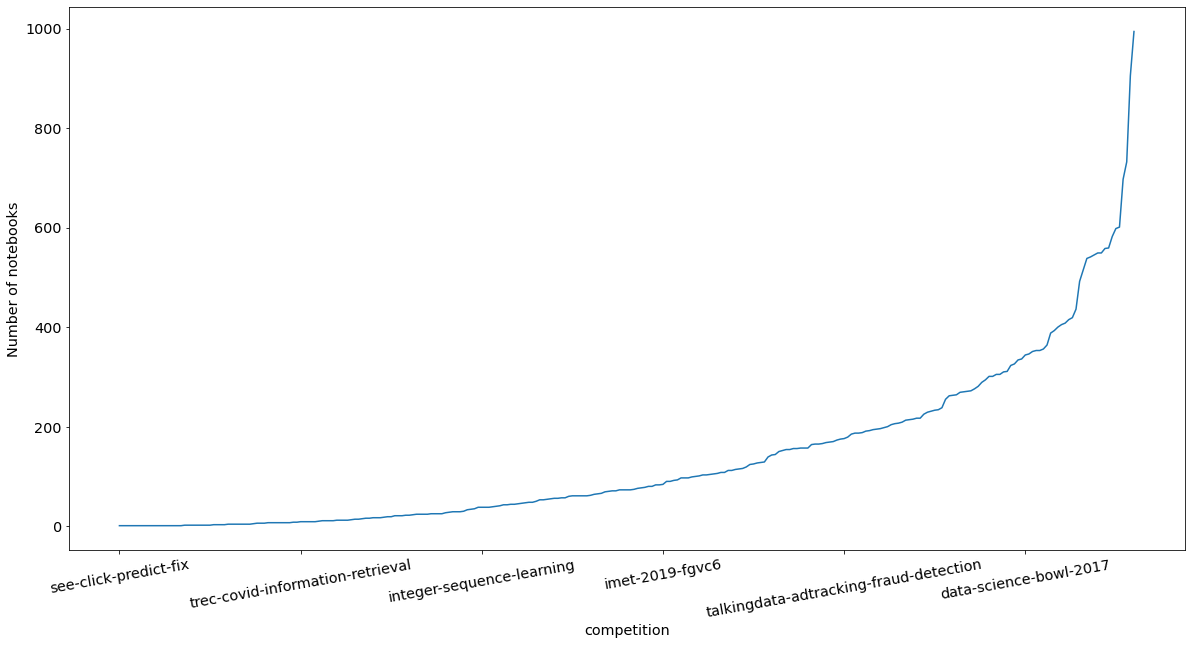

In [15]:
print(df.groupby(by="competition")['filename'].nunique().sort_values())
ax = df.groupby(by="competition")['filename'].nunique().sort_values().plot();
ax.set_ylabel("Number of notebooks")
plt.xticks(rotation=10);

# Notebook-level

## What is the distribution of markdown usage?

A significant portion (~31%) of notebooks don't contain any markdown.

Markdown makes up between 0%-60% of most notebooks. 

Median markdown ratio 0.1724137931034483
Mean markdown ratio 0.2037695836606751
Percentage of notebooks with no markdown 0.3134363541121006


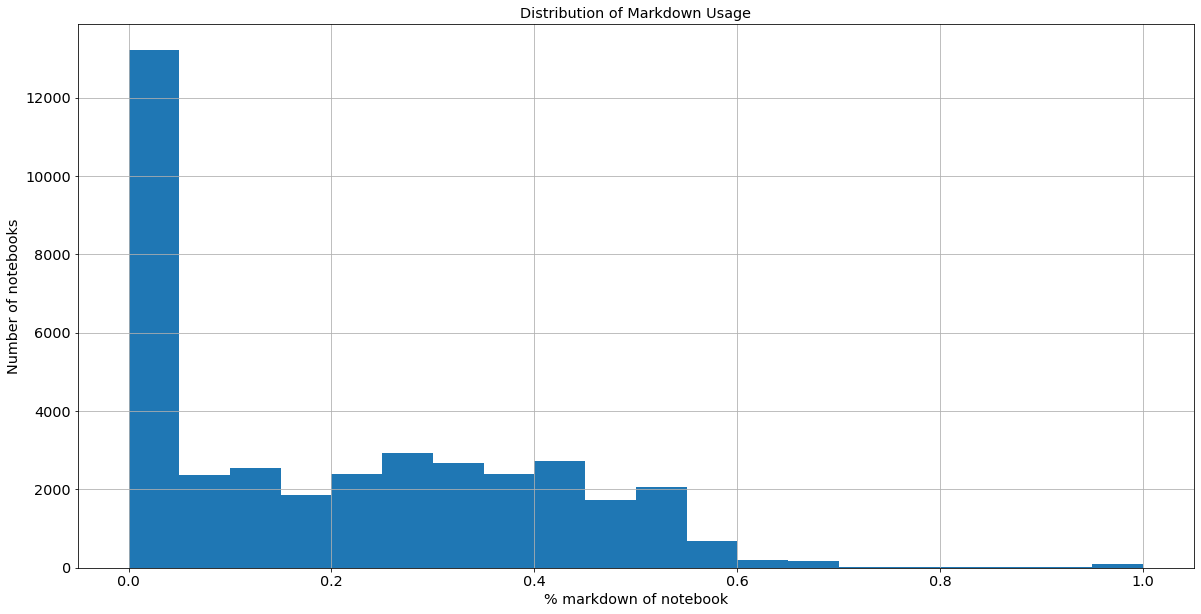

In [19]:
# Use mean here because it is  num markdown cells / total cells 
markdownRatio = df.groupby(by="filename").mean()['isMarkdown']
axes = markdownRatio.hist(figsize=(20,10), bins=20);
print("Median markdown ratio", markdownRatio.median())
print("Mean markdown ratio", markdownRatio.mean())
print("Percentage of notebooks with no markdown", len(markdownRatio[markdownRatio==0])/len(markdownRatio))

axes.set_title("Distribution of Markdown Usage");
axes.set_xlabel("% markdown of notebook");
axes.set_ylabel("Number of notebooks");


## How content-rich are markdown cells?

count    303041.000000
mean         30.088625
std          64.431082
min           0.000000
25%           4.000000
50%          10.000000
75%          32.000000
max        6132.000000
Name: wordcount, dtype: float64

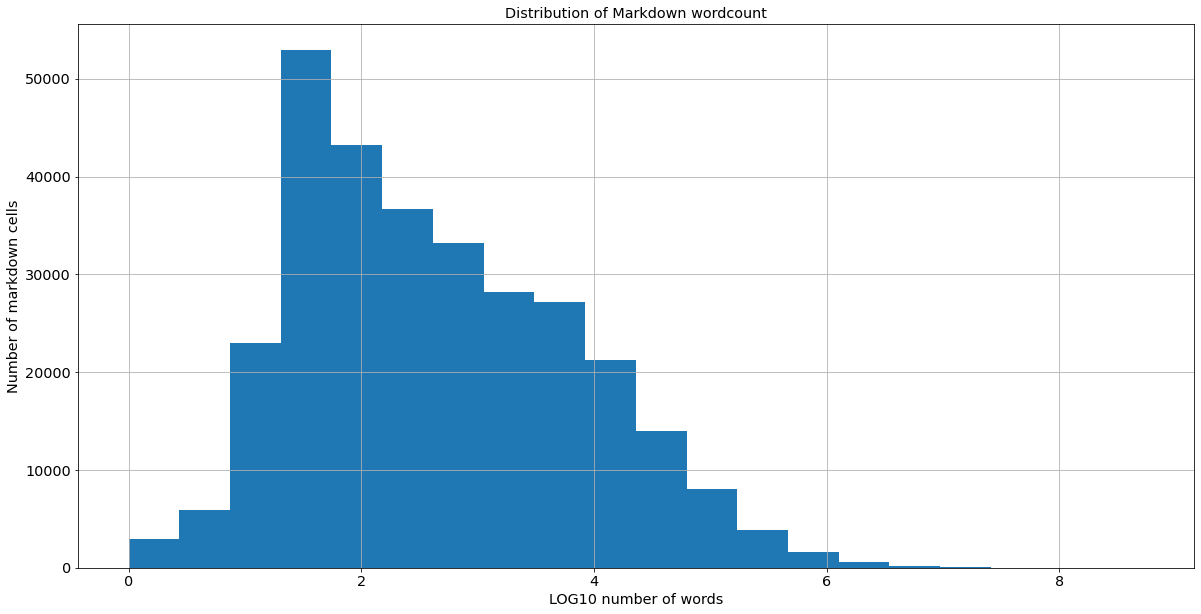

In [70]:
axes = np.log1p(df[df.cell_type == "markdown"]['wordcount']).hist(figsize=(20,10), bins=20);

axes.set_title("Distribution of Markdown wordcount");
ax.set_xscale('log')
axes.set_xlabel("LOG10 number of words");
axes.set_ylabel("Number of markdown cells");
df[df.cell_type == "markdown"]['wordcount'].describe()

## What are the most common keywords in markdown cells?

<ipython-input-27-60ad92e2bbe3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markdowns['source_removestopwords'] = markdowns['source'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x.lower()))
<ipython-input-27-60ad92e2bbe3>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


[('data', 66091), ('model', 39789), ('training', 25319), ('use', 23710), ('test', 22625), ('features', 22586), ('train', 19745), ('number', 19553), ('feature', 17680), ('values', 16708), ('set', 15558), ('dataset', 14861), ('images', 13785), ('different', 13312), ('time', 13250), ('image', 13010), ('like', 11646), ('look', 11048), ('create', 10076), ('need', 9726), ('value', 9601), ('kernel', 9468), ('learning', 9349), ('function', 9294), ('models', 8761), ('new', 8450), ('distribution', 8399), ('validation', 8389), ('check', 8282), ('notebook', 8211), ('score', 8158), ('target', 8018), ('missing', 7849), ('columns', 7814), ('based', 7774)]


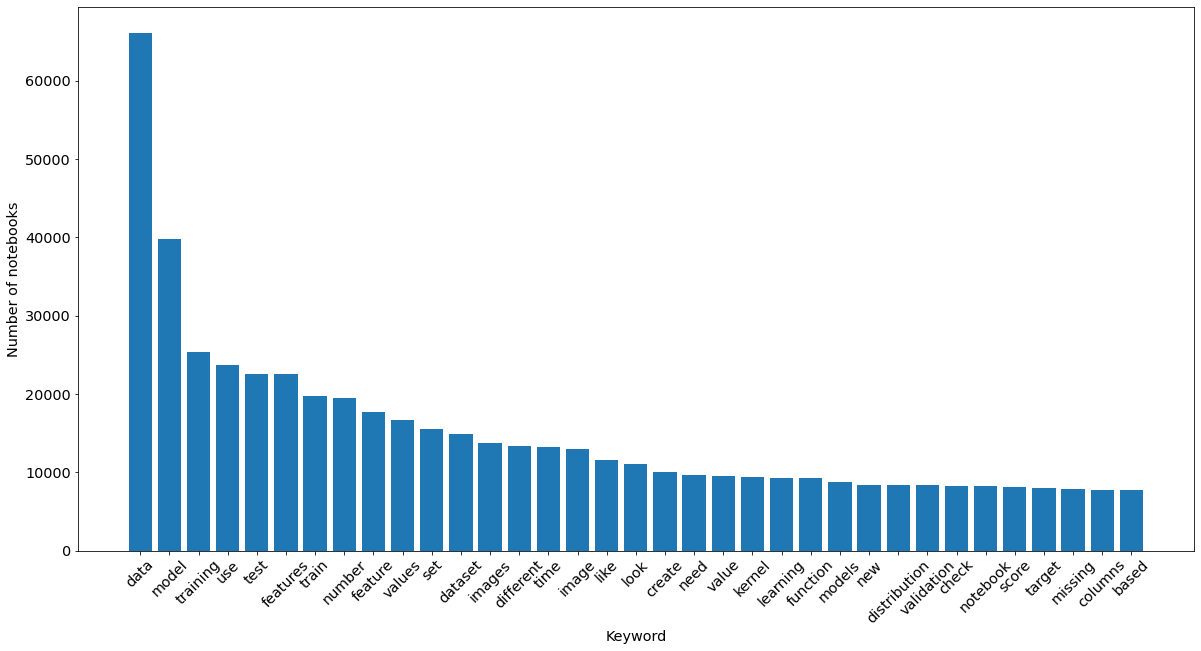

In [27]:
markdowns = df[df.cell_type == "markdown"] 
# markdowns = markdowns.sample(100)
markdowns['source_removestopwords'] = markdowns['source'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x.lower()))
# print(markdowns['source_removestopwords'])
# print(markdowns['source'])
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_xlabel("Keyword");
ax.set_ylabel("Number of notebooks");


ax.tick_params(axis='both', which='major')

top50 = Counter(" ".join(markdowns["source_removestopwords"]).split()).most_common(50)
top50 =  [x for x in top50 if (x[0].isalpha())]
plt.bar(x=[a[0] for a in top50], height=[a[1] for a in top50])

symbols = [x for x in top50 if (not x[0].isalpha() & (not x[0].isnumeric()))]

# print(symbols)
print(top50);

## 

# What libraries/functions are practitioners using?

Library/function lookup sources:
- Most downloaded PyPi packages: https://hugovk.github.io/top-pypi-packages/
- Microsoft python-program-analysis files: https://github.com/Ecocytus/python-program-analysis

## What libraries are popular in notebooks?

In [21]:
import ast
import re
# from https://stackoverflow.com/a/44988778
def getModules(import_string):
    import_string = import_string.replace("\n", " \n")
    mylist = import_string.split(" ")
    deleting = False
    for i in range(len(mylist)):
        if mylist[i] == "!":
            next = mylist[i:].find("\n")
            del mylist[i:next]
    import_string = " ".join(mylist)
    import_string = import_string.replace("\n ", "\n")
        
        
    

    modules = []
    for node in ast.walk(ast.parse(import_string)):
        try:
            if isinstance(node, ast.ImportFrom):
                if not node.names[0].asname:  # excluding the 'as' part of import
                    modules.append(node.module)
            elif isinstance(node, ast.Import): # excluding the 'as' part of import
                if not node.names[0].asname:
                    modules.append(node.names[0].name)
        except SyntaxError:
            continue
    return modules

In [22]:
# Load the data file
with open("data/library-specs/top-pypi-packages-365-days.json") as f:
    topLibrariesFull = json.load(f)
    # print(topLibraries['rows'])

topLibraries = set([x['project'] for x in topLibrariesFull['rows']][0:100])
# print("Toplibraries are", topLibraries)
smallDf = df


def checkInTopLibraries(x):
    """ Check each word of source code in a cell against the topLibraries set. 
    Args:
        x (string) The input string. Must be converted into a list of strings.
    Returns:
        ret (string) A comma-separated string of libraries detected in the string, e.g. "numpy,pandas,tensorflow"
    """    
    
    retList = []
    for item in x.split(" "):
        if item in topLibraries:
            retList.append(item)
    if (len(retList) == 0):
        ret = "None"
    else:
        ret = ','.join(retList)
    
    return ret  

# Filter text by library
smallDf['libraries'] = smallDf['source'].apply(checkInTopLibraries)


In [23]:
# Having memory issues so I need to sample a subset of the dataset
libraryCounts = smallDf.sample(10000).libraries.str.split(',', expand=True).stack().value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(libraryCounts)

None            9545
numpy            406
pandas           361
tqdm              71
scipy             31
matplotlib        30
future            17
pip                6
joblib             3
scikit-learn       3
coverage           1
ipython            1
six                1
click              1
py                 1
dtype: int64

<AxesSubplot:>

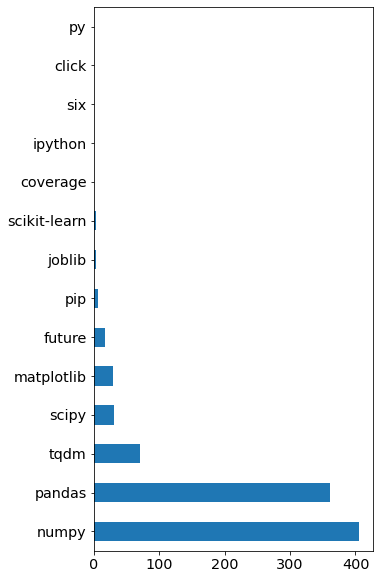

In [24]:
libraryCounts[1:100].plot.barh(figsize=(5,10))

# What is the distribution of cells per notebook?

Most notebooks have 0-50 cells.

75% of all notebooks have a **maximum** of 39 cells.

              count
count  38180.000000
mean      30.399843
std       31.176661
min        1.000000
25%       11.000000
50%       22.000000
75%       39.000000
max      678.000000


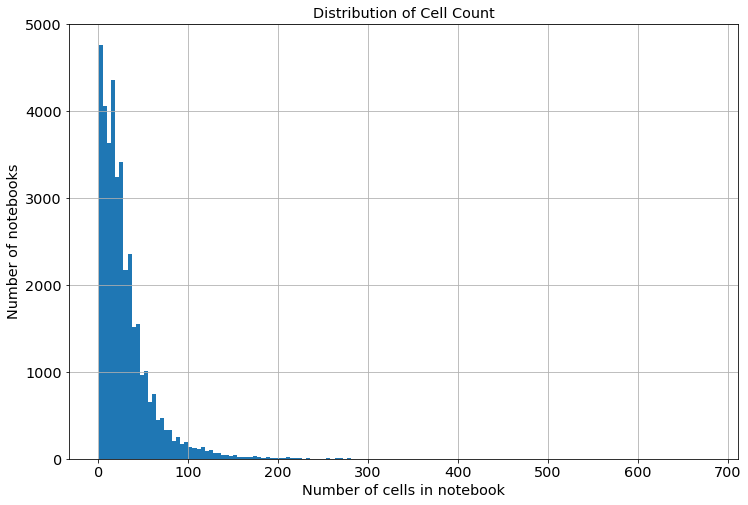

In [6]:
# Plot distribution
ax = df.groupby(['filename']).agg(['count'])['source'].hist(bins=150, figsize=(12,8))
plt.title('Distribution of Cell Count')
plt.ylabel("Number of notebooks")
plt.xlabel("Number of cells in notebook")

# Describe the distribution
print(df.groupby(['filename']).agg(['count'])['source'].describe())